In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 



In [32]:
df = pd.read_csv('heart_2020.csv')
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


# Preprocessing

In [33]:
df.shape

(319795, 18)

In [34]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [35]:
df.duplicated().sum()

18078

In [36]:
df.drop_duplicates(inplace=True)

In [37]:
df.duplicated().sum()

0

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     301717 

In [39]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [40]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [41]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [42]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


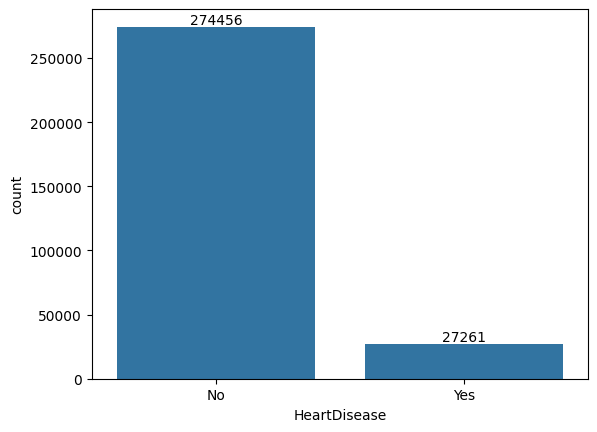

In [43]:
ax = sns.countplot(x='HeartDisease', data=df)
for bars in ax.containers:
  ax.bar_label(bars)
plt.show()

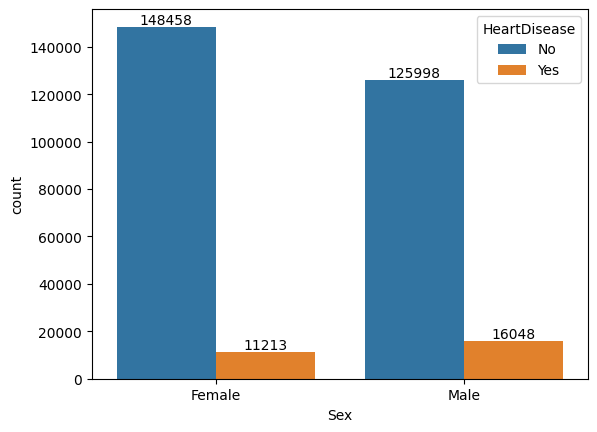

In [44]:
ax = sns.countplot(x='Sex', hue='HeartDisease', data=df)
for bars in ax.containers:
  ax.bar_label(bars)
plt.show()


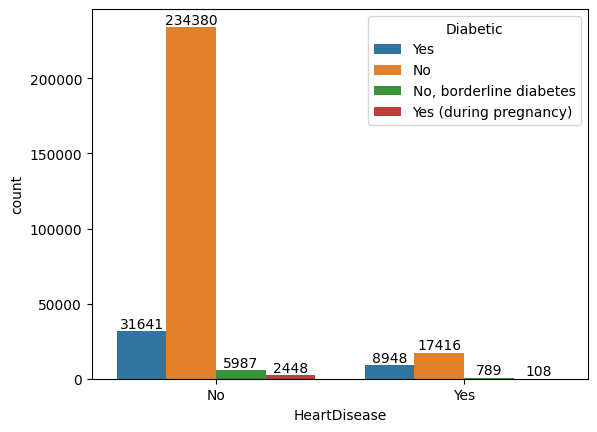

In [45]:
ax = sns.countplot(x='HeartDisease', hue='Diabetic', data=df)
for bars in ax.containers:
  ax.bar_label(bars)
plt.show()


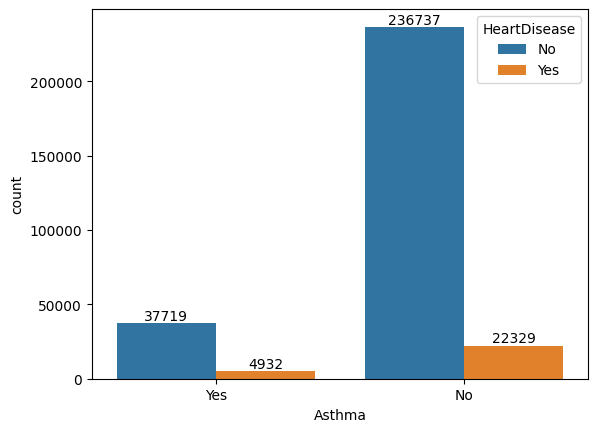

In [46]:
ax = sns.countplot(x='Asthma', hue='HeartDisease', data=df)
for bars in ax.containers:
  ax.bar_label(bars)
plt.show()


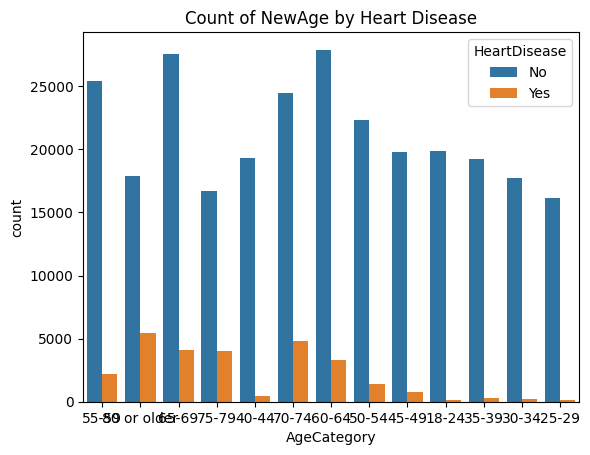

In [47]:
# Count plot for Heart Disease
sns.countplot(x='AgeCategory', data=df, hue='HeartDisease')
plt.title('Count of NewAge by Heart Disease')
plt.show()


<Axes: xlabel='BMI', ylabel='Count'>

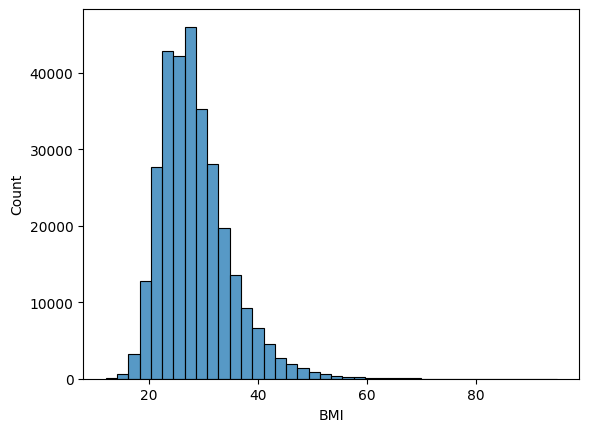

In [48]:
sns.histplot(df['BMI'],bins=40)

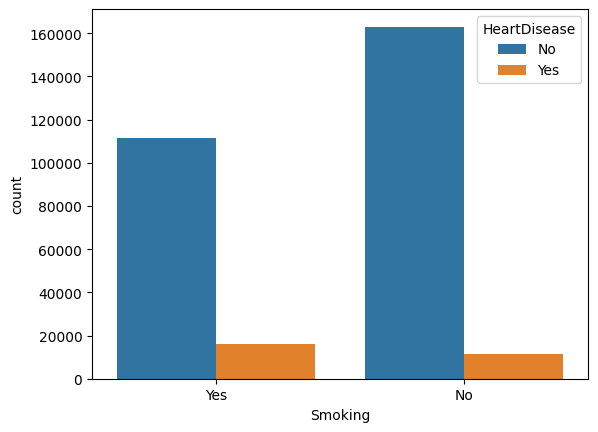

In [49]:
# Count plot for Heart Disease
sns.countplot(x='Smoking', data=df, hue='HeartDisease')
plt.show()


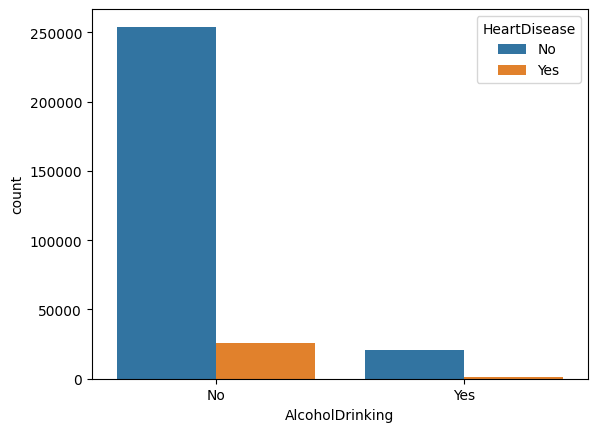

In [50]:
# Count plot for Heart Disease
sns.countplot(x='AlcoholDrinking', data=df, hue='HeartDisease')
plt.show()


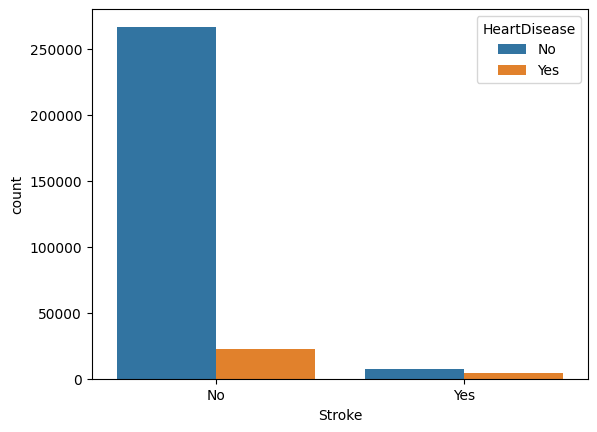

In [51]:
# Count plot for Heart Disease
sns.countplot(x='Stroke', data=df, hue='HeartDisease')
plt.show()


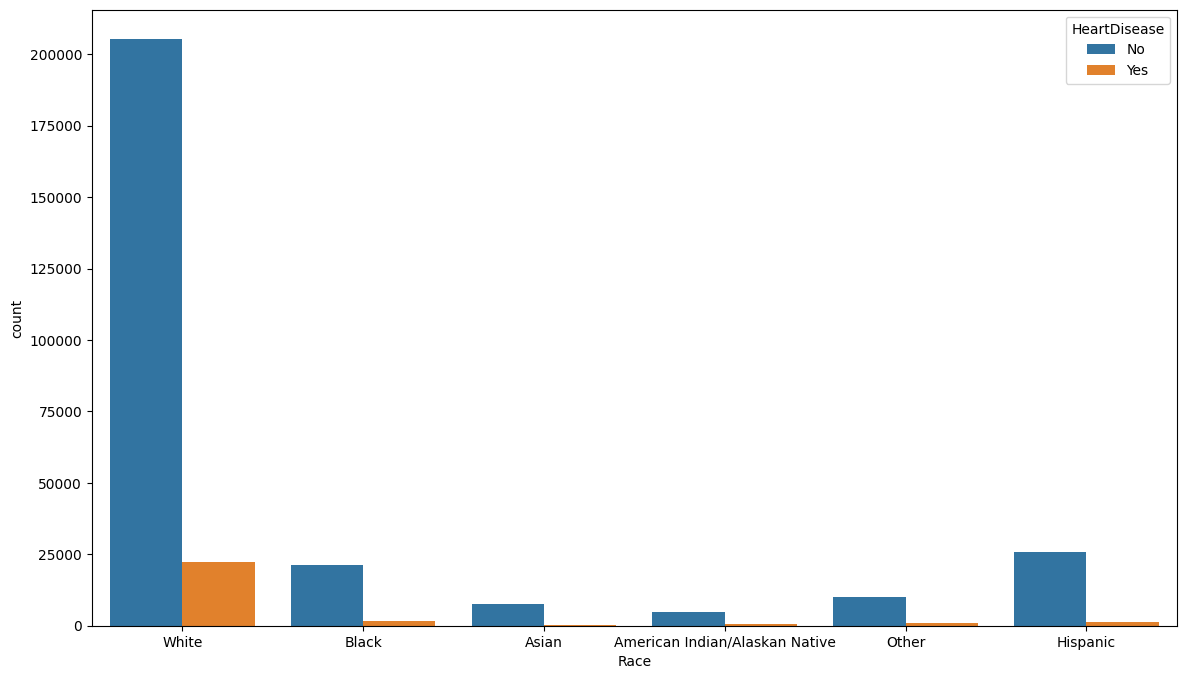

In [52]:
# Count plot for Heart Disease
plt.figure(figsize=(14, 8))
sns.countplot(x='Race', data=df, hue='HeartDisease')
plt.show()


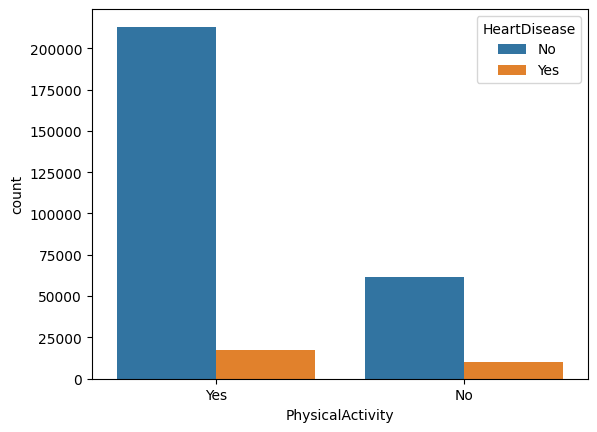

In [53]:
# Count plot for Heart Disease
sns.countplot(x='PhysicalActivity', data=df, hue='HeartDisease')
plt.show()


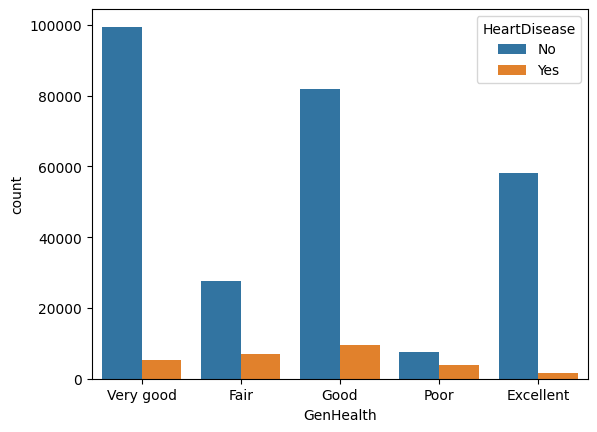

In [54]:
# Count plot for Heart Disease

sns.countplot(x='GenHealth', data=df, hue='HeartDisease')
plt.show()


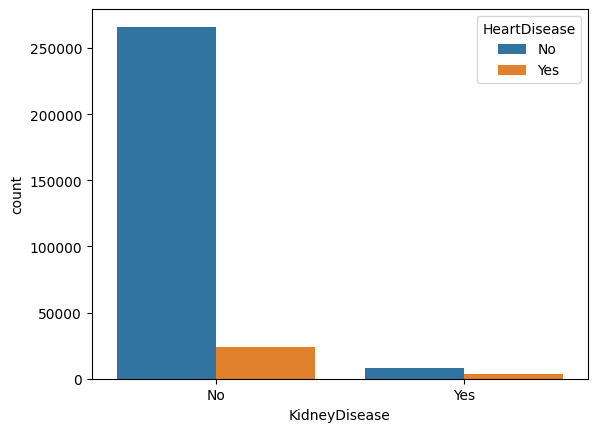

In [55]:
# Count plot for Heart Disease

sns.countplot(x='KidneyDisease', data=df, hue='HeartDisease')
plt.show()


<Axes: xlabel='PhysicalHealth', ylabel='Count'>

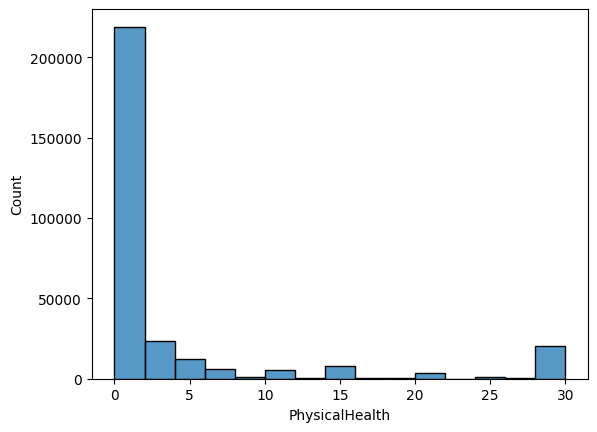

In [56]:
sns.histplot(df['PhysicalHealth'],bins=15)

<Axes: xlabel='MentalHealth', ylabel='Count'>

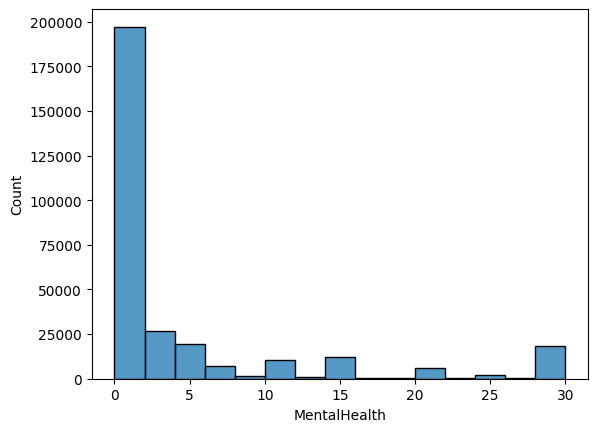

In [57]:
sns.histplot(df['MentalHealth'],bins=15)

<Axes: xlabel='SleepTime', ylabel='Count'>

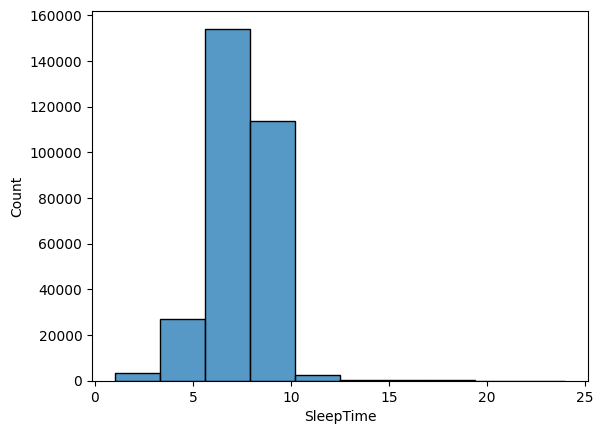

In [58]:
sns.histplot(df['SleepTime'],bins=10)